In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

The data is from Deep Learning A-Z course in Udemy. This implementation will not using TensorFlow or PyTorch. But manually with Math.

## **Data Preprocessing**

### **Import Data**

In [176]:
data = pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Predict if a customer is stay or leave the bank. \
I only need column 3 (CredditScore) until column 12 (EstimatedSalary) as input data (Independent variable). \
Then, use the last column (Exited) for output (Dependent Variable).

Encode the non-numerical data: column 4 "Geography" and column 5 "Gender"

### **Encode the Data**

In [177]:
# Encode the Geography
decoded_Geo     = data.iloc[:, 4].values
country         = {Geography: i for i, Geography in enumerate(np.unique(decoded_Geo))}
encoded_Geo     = np.array([country[value] for value in decoded_Geo])
data.iloc[:, 4] = encoded_Geo

# Encode the Gender
decoded_Gen     = data.iloc[:, 5].values
gend            = {Gender: i for i, Gender in enumerate(np.unique(decoded_Gen))}
encoded_Gen     = np.array([gend[value] for value in decoded_Gen])
data.iloc[:, 5] = encoded_Gen

In [178]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


### **Split the Data**

x = independent variable \
y = dependent variable

In [179]:
x = data.iloc[:, 3:13].values
y = data.iloc[:, 13].values

Split into training and data set. For now, I don't use stochastic or mini-batch gradient descent. Training set 80% and test set 20%.

In [180]:
# Training set
x_train = pd.DataFrame(x).iloc[0:int(x.shape[0]*0.8), :].values
y_train = pd.DataFrame(y).iloc[0:int(y.shape[0]*0.8), :].values

# Test set
x_test = pd.DataFrame(x).iloc[int(x.shape[0]*0.8):, :].values
y_test = pd.DataFrame(y).iloc[int(y.shape[0]*0.8):, :].values

### **Scale the Data**

Scale the data into between 0.0 to 1.0 with Normalization

$x_{\text{normalized}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$


In [181]:
def normalization(input):
    input = (input - np.min(input, axis=0)) / (np.max(input, axis=0) - np.min(input, axis=0))
    return input

x_train = normalization(x_train)
x_test  = normalization(x_test)

In [182]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9
0,0.538,0.0,0.0,0.324324,0.2,0.0,0.0,1.0,1.0,0.506735
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.0,0.0,1.0,0.562709
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,0.0,0.283784,0.1,0.0,0.333333,0.0,0.0,0.46912
4,1.0,1.0,0.0,0.337838,0.2,0.500246,0.0,1.0,1.0,0.3954
...,...,...,...,...,...,...,...,...,...,...
7995,0.716,0.0,0.0,0.662162,0.1,0.0,0.333333,0.0,1.0,0.019129
7996,0.734,0.0,0.0,0.054054,0.5,0.44825,0.0,1.0,1.0,0.464875
7997,0.23,0.5,1.0,0.081081,0.6,0.621795,0.0,1.0,0.0,0.956875
7998,0.958,0.5,1.0,0.135135,0.3,0.527726,0.666667,1.0,0.0,0.524438


## **Build The Neural Network**

I need to work on Neural Network that has 10 input neurons (because 10 features data) and then 2 hidden layer with 6 neurons each. It will produce 1 output. That means, it will have 3 times dot products.

### **Set the activation function**

In [183]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

### **Forward**

Forward is simply a dot product. The columns of a matrix will determine how many rows next matrix will be and the rows is equivalent with previous matrix' columns.

$y = x w + b$

$y$ = predicted output \
$x$ = input \
$b$ = bias

### **Training**

In [184]:
h_layer1 = 6
h_layer2 = 6

rate   = 0.01
epochs = 100

In [185]:
# Finite Difference
w1 = np.random.randn(x_train.shape[1], h_layer1) * np.sqrt(2 / x_train.shape[1])
b1 = np.random.rand(1, h_layer1)
w2 = np.random.randn(h_layer1, h_layer2) * np.sqrt(2 / h_layer1)
b2 = np.random.rand(1, h_layer2)
w3 = np.random.randn(h_layer2, 1) * np.sqrt(2 / h_layer2)
b3 = np.random.rand(1, 1)

# For Backpropagation
w1_copy = w1.copy()
b1_copy = b1.copy()
w2_copy = w2.copy()
b2_copy = b2.copy()
w3_copy = w3.copy()
b3_copy = b3.copy()

### **Train with Finite Difference**

$ f'(x) \approx \frac{f(x + h) - f(x)}{h} $

$h$ = epsilon \
$f(x)$ = cost function \
$f'(x)$ = approximate derivative


In [186]:
# Forward

def cost(x_train, y_train, w1, w2, w3, b1, b2, b3):
    result = 0
    for i in range(x_train.shape[0]):
        # Forward pass
        x  = np.array([x_train[i]], dtype=float)
        z1 = relu(np.dot(x, w1) + b1)
        z2 = relu(np.dot(z1, w2) + b2)
        y_pred = sigmoid(np.dot(z2, w3) + b3)

        # Cost
        error = y_pred - y_train[i]
        result += error ** 2

    return result / x_train.shape[0]  # Averaging the cost

In [187]:
eps    = 1e-5
for epoch in range(epochs):
    c = cost(x_train, y_train, w1, w2, w3, b1, b2, b3)

    dw1 = (cost(x_train, y_train, w1 + eps * np.ones_like(w1), w2, w3, b1, b2, b3) - c) / eps
    dw2 = (cost(x_train, y_train, w1, w2 + eps * np.ones_like(w2), w3, b1, b2, b3) - c) / eps
    dw3 = (cost(x_train, y_train, w1, w2, w3 + eps * np.ones_like(w3), b1, b2, b3) - c) / eps
    db1 = (cost(x_train, y_train, w1, w2, w3, b1 + eps * np.ones_like(b1), b2, b3) - c) / eps
    db2 = (cost(x_train, y_train, w1, w2, w3, b1, b2 + eps * np.ones_like(b2), b3) - c) / eps
    db3 = (cost(x_train, y_train, w1, w2, w3, b1, b2, b3 + eps * np.ones_like(b3)) - c) / eps

    w1 -= rate * dw1
    w2 -= rate * dw2
    w3 -= rate * dw3
    b1 -= rate * db1
    b2 -= rate * db2
    b3 -= rate * db3

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Cost: {c}")

Epoch 0, Cost: [[0.36562784]]
Epoch 10, Cost: [[0.31719403]]
Epoch 20, Cost: [[0.28515755]]
Epoch 30, Cost: [[0.260049]]
Epoch 40, Cost: [[0.23824012]]
Epoch 50, Cost: [[0.21909275]]
Epoch 60, Cost: [[0.20363111]]
Epoch 70, Cost: [[0.19280303]]
Epoch 80, Cost: [[0.18617763]]
Epoch 90, Cost: [[0.18248523]]


### **Train with Backpropagation**

### **Forward Pass**
$$
a_1 = \sigma(x w_1 + b_1) \quad \text{(ReLU)}
$$
$$
a_2 = \sigma(a_1 w_2 + b_2) \quad \text{(ReLU)}
$$
$$
a_3 = \sigma(a_2 w_3 + b_3) \quad \text{(Sigmoid)}
$$

### **Gradients**
Gradient for \( $w_3$ \):
$$
\\∂ w_3 C = \frac{1}{n} \sum_{i=1}^n 2(a_3 - y) a_3 (1 - a_3) a_2
$$

Gradient for \( $b_3$ \):
$$
\\∂ b_3 C = \frac{1}{n} \sum_{i=1}^n 2(a_3 - y) a_3 (1 - a_3)
$$

Gradient for \( $w_2$ \):
$$
\\∂ w_2 C =
\begin{cases}
    \frac{1}{n} \sum_{i=1}^n 2(a_3 - y)a_3 (1 - a_3) w_3 a_1 & \text{if } a_1 w_2 + b_2 > 0 \\
    0 & \text{if } a_1 w_2 + b_2 \leq 0
\end{cases}
$$

Gradient for \( $b_2$ \):
$$
\\∂ b_2 C =
\begin{cases}
    \frac{1}{n} \sum_{i=1}^n 2(a_3 - y)a_3 (1 - a_3) w_3 & \text{if } a_1 w_2 + b_2 > 0 \\
    0 & \text{if } a_1 w_2 + b_2 \leq 0
\end{cases}
$$

Gradient for \( $w_1$ \):
$$
\\∂ w_1 C =
\begin{cases}
    \frac{1}{n} \sum_{i=1}^n 2(a_3 - y)a_2 (1 - a_3) w_3 w_2 x_1 & \text{if } a_1 w_1 + b_1 > 0 \text{ and } x_1 w_1 + b_1 > 0 \\
    0 & \text{otherwise}
\end{cases}
$$

Gradient for \( $b_1$ \):
$$
\\∂ b_1 C =
\begin{cases}
    \frac{1}{n} \sum_{i=1}^n 2(a_3 - y)a_3 (1 - a_3) w_3 w_2 & \text{if } a_1 w_1 + b_1 > 0 \text{ and } x_1 w_1 + b_1 > 0 \\
    0 & \text{otherwise}
\end{cases}
$$


In [188]:
def dw3(a2, y_pred, y_train):
    result = 0
    for i in range(x_train.shape[0]):
        delta3 = 2 * (y_pred[i] - y_train[i]) * y_pred[i] * (1 - y_pred[i])
        result += np.outer(a2[i], delta3)
    return result / x_train.shape[0]

def db3(y_pred, y_train):
    result = 0
    for i in range(x_train.shape[0]):
        result += 2 * (y_pred[i] - y_train[i]) * y_pred[i] * (1 - y_pred[i])
    return result / x_train.shape[0]

def dw2(a1, a2, y_pred, y_train, w2, w3, b2):
    result = 0
    for i in range(x_train.shape[0]):
        activation = np.dot(a1[i], w2) + b2
        if np.all(activation > 0):
            delta3 = 2 * (y_pred[i] - y_train[i]) * y_pred[i] * (1 - y_pred[i]) * w3 * a1[i]
            result += delta3
        else:
            result += 0
    return result / x_train.shape[0]

def db2(a1, y_pred, y_train, w2, w3, b2):
    result = 0
    for i in range(x_train.shape[0]):
        activation = np.dot(a1[i], w2) + b2
        if np.all(activation > 0):
            delta3 = 2 * (y_pred[i] - y_train[i]) * y_pred[i] * (1 - y_pred[i]) * w3
            result += delta3
        else:
            result += 0
    return result / x_train.shape[0]

def dw1(x_train, a1, y_pred, y_train, w1, w2, w3, b1, b2):
    result = 0
    for i in range(x_train.shape[0]):
        activation1 = np.dot(a1[i], w2) + b2
        activation2 = np.dot(x_train[i], w1) + b1
        if np.all(activation1 > 0) and np.all(activation2 > 0):
            delta3 = 2 * (y_pred[i] - y_train[i]) * y_pred[i] * (1 - y_pred[i]) * w3 * w2 * x_train[i]
            result += delta3
        else:
            result += 0
    return result / x_train.shape[0]

def db1(x_train, a1, y_pred, y_train, w1, w2, w3, b1, b2):
    result = 0
    for i in range(x_train.shape[0]):
        activation1 = np.dot(a1[i], w2) + b2
        activation2 = np.dot(x_train[i], w1) + b1
        if np.all(activation1 > 0) and np.all(activation2 > 0):
            delta3 = 2 * (y_pred[i] - y_train[i]) * y_pred[i] * (1 - y_pred[i]) * w3 * w2
            result += delta3
        else:
            result += 0
    return result / x_train.shape[0]


In [189]:
for epoch in range(epochs):
    # Forward
    x = np.array(x_train, dtype=float)
    a1 = relu(np.dot(x, w1_copy) + b1_copy)
    a2 = relu(np.dot(a1, w2_copy) + b2_copy)
    y_pred = sigmoid(np.dot(a2, w3_copy) + b3_copy)

    # Backpropagation
    d_w3 = dw3(a2, y_pred, y_train)
    d_b3 = db3(y_pred, y_train)
    d_w2 = dw2(a1, a2, y_pred, y_train, w2_copy, w3_copy, b2_copy)
    d_b2 = db2(a1, y_pred, y_train, w2_copy, w3_copy, b2_copy)
    d_w1 = dw1(x_train, a1, y_pred, y_train, w1_copy, w2_copy, w3_copy, b1_copy, b2_copy)
    d_b1 = db1(x_train, a1, y_pred, y_train, w1_copy, w2_copy, w3_copy, b1_copy, b2_copy)

    d_w1 = np.array(d_w1, dtype=float)
    d_b1 = np.array(d_b1, dtype=float)
    d_w2 = np.array(d_w2, dtype=float)
    d_b2 = np.array(d_b2, dtype=float)
    d_w3 = np.array(d_w3, dtype=float)
    d_b3 = np.array(d_b3, dtype=float)

    w1_copy -= rate * d_w1
    b1_copy -= rate * d_b1
    w2_copy -= rate * d_w2
    b2_copy -= rate * d_b2
    w3_copy -= rate * d_w3
    b3_copy -= rate * d_b3

    if epoch % 10 == 0:
        cost_value = np.mean((y_pred - y_train) ** 2)
        print(f"Epoch {epoch}, Cost: {cost_value}")


Epoch 0, Cost: 0.3656278404055566
Epoch 10, Cost: 0.3454238545770061
Epoch 20, Cost: 0.3268699969130848
Epoch 30, Cost: 0.31010301675072743
Epoch 40, Cost: 0.2951423759326253
Epoch 50, Cost: 0.28191926994167066
Epoch 60, Cost: 0.27030804839259953
Epoch 70, Cost: 0.26015339220555345
Epoch 80, Cost: 0.251290543366381
Epoch 90, Cost: 0.24355859765425378


## **Visualize the neural network**

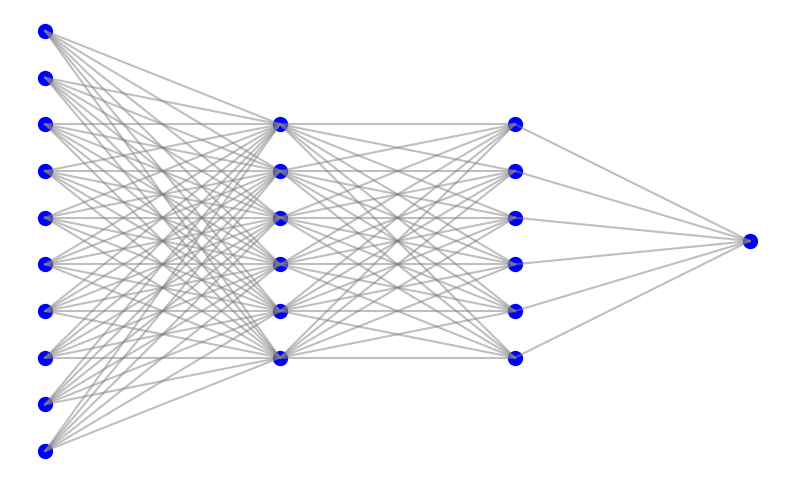

In [190]:
def plot_neural_network():
    layer_sizes = [x_train.shape[1], h_layer1, h_layer2, 1]
    fig, ax = plt.subplots(figsize=(10, 6))

    # Draw nodes
    for i, layer_size in enumerate(layer_sizes):
        x_pos = i * 2  # Space between layers
        for j in range(layer_size):
            y_pos = j - layer_size / 2
            ax.scatter(x_pos, y_pos, s=100, color="blue")

    # Draw connections
    for i in range(len(layer_sizes) - 1):
        for j in range(layer_sizes[i]):
            for k in range(layer_sizes[i + 1]):
                ax.plot(
                    [i * 2, (i + 1) * 2],
                    [j - layer_sizes[i] / 2, k - layer_sizes[i + 1] / 2],
                    color="gray",
                    alpha=0.5,
                )

    ax.axis("off")
    plt.show()

plot_neural_network()


In [191]:
# # Neural network dimensions
# layer_sizes = [x_train.shape[1], h_layer1, h_layer2, 1]

# # Function to draw the neural network
# def draw_network(ax, layer_sizes, dropout_mask=None):
#     ax.clear()
#     for i, layer_size in enumerate(layer_sizes):
#         x_pos = i * 2  # Space between layers
#         for j in range(layer_size):
#             y_pos = j - layer_size / 2
#             color = "blue" if dropout_mask is None or dropout_mask[i][j] else "gray"
#             ax.scatter(x_pos, y_pos, s=100, color=color)

#         if i > 0:  # Draw connections
#             for j in range(layer_sizes[i - 1]):
#                 for k in range(layer_size):
#                     color = "gray" if dropout_mask and not dropout_mask[i][k] else "blue"
#                     ax.plot(
#                         [x_pos - 2, x_pos],
#                         [j - layer_sizes[i - 1] / 2, k - layer_size / 2],
#                         color=color,
#                         alpha=0.5,
#                     )
#     ax.axis("off")
#     ax.set_title("Neural Network Training with Dropout")

# # Generate dropout masks
# def generate_dropout_masks(layer_sizes, dropout_rate=0.2):
#     masks = []
#     for size in layer_sizes:
#         mask = np.random.rand(size) > dropout_rate
#         masks.append(mask)
#     return masks

# # Animation function
# def update(frame, ax, layer_sizes):
#     dropout_mask = generate_dropout_masks(layer_sizes)
#     draw_network(ax, layer_sizes, dropout_mask)

# fig, ax = plt.subplots(figsize=(10, 6))
# ani = FuncAnimation(fig, update, frames=50, fargs=(ax, layer_sizes))

# # Save animation to a file
# ani.save("neural_network_dropout_training.mp4", writer="ffmpeg", fps=10)
# plt.show()
